# Ссылка на соревнование и скачивание архива


[Ссылка на соревнование](https://mlbootcamp.ru/round/15/tasks/?utm_source=vk&utm_medium=social_post&utm_campaign=mlbootcamp7&utm_term=vk-announcement-15-11-2018&utm_content=1)

[Ссылка на скачивание архива](https://mlbootcamp.ru/media/condition/condition_csi.zip)

# Импортирование библиотек

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import xgboost as xgb
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from scipy import stats
from scipy.stats import itemfreq
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
import pickle
import random
%matplotlib inline

In [293]:
!ls

random_submission.csv  subs_csi_test.csv   subs_features_test.csv
sample_data	       subs_csi_train.csv  subs_features_train.csv


# Предобработка

In [294]:
subs_features_train = pd.read_csv('subs_features_train.csv', sep=';', decimal=',',encoding = "windows-1251")
subs_csi_train = pd.read_csv('subs_csi_train.csv', sep=';', decimal=',',encoding = "windows-1251")

print(subs_features_train.shape)  
print(subs_csi_train.shape)    
# В первой таблице из за повторяющихся SK_ID получилось больше строк

(47411, 36)
(4222, 3)


In [295]:
subs_features_train = subs_features_train.drop_duplicates('SK_ID') # Удаляем дубликаты SK_ID
subs_features_train.sort_values('SK_ID',ascending = True) # Сортируем таблицу по возрастанию SK_ID
print(subs_features_train.shape) 

(4222, 36)


In [0]:
train = subs_features_train
target_table_train = subs_csi_train

In [297]:
subs_features_test = pd.read_csv('subs_features_test.csv', sep=';', decimal=',',encoding = "windows-1251")
subs_csi_test = pd.read_csv('subs_csi_test.csv', sep=';', decimal=',',encoding = "windows-1251")

print(subs_features_test.shape)
print(subs_csi_test.shape)
# Аналогичная ситуация с тестовыми данными

(58989, 36)
(5221, 2)


In [298]:
subs_features_test = subs_features_test.drop_duplicates('SK_ID')
print(subs_features_test.shape)

(5221, 36)


In [0]:
test = subs_features_test
target_table_test = subs_csi_test

In [300]:
train.fillna(train.mean()) # Заполняем пустые значения средними в данном столбце
test.fillna(test.mean())

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,01.08.2001,1,1,30,4,2,1,11.0,1,1620.000000,...,1,1,0.018804,0.050461,0.004582,0.005395,0.049758,0.027579,0.103896,7.000000
12,01.07.2001,4,29,54,5,2,1,7.0,1,1056.000000,...,1,1,0.022823,0.005187,0.001636,0.001061,0.015335,0.027579,0.103896,9.000000
24,01.05.2002,5,32,48,5,2,1,5.0,4,785.000000,...,1,1,0.003330,0.000586,0.000000,0.000032,0.047629,0.027579,0.103896,10.000000
36,01.05.2002,4,74,47,11,1,1,12.0,2,175.000000,...,1,1,0.000989,0.000717,0.034058,0.000000,0.004041,0.027579,0.103896,2.000000
40,01.05.2002,5,80,64,13,1,1,12.0,2,1629.000000,...,1,1,0.097227,0.011057,0.092336,0.000000,0.058567,0.027579,0.103896,2.000000
46,01.05.2002,5,91,14,5,2,1,8.0,2,598.000000,...,1,1,0.025763,0.016189,0.008025,0.000000,0.023116,0.027579,0.103896,9.000000
58,01.07.2001,4,104,43,9,1,0,1.0,9,875.535826,...,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.027579,0.103896,5.590502
70,01.01.2002,2,105,32,17,1,1,8.0,2,820.000000,...,1,0,0.011994,0.024195,0.012332,0.004427,0.019716,0.027579,0.108236,5.590502
75,01.01.2002,3,111,1,5,2,1,12.0,2,1043.000000,...,1,1,0.151504,0.148564,0.000000,0.000000,0.181555,0.027579,0.103896,1.000000
87,01.10.2001,8,117,29,5,2,1,11.0,1,1518.000000,...,1,1,0.001622,0.024734,0.001543,0.002194,0.028447,0.027579,0.103896,9.000000


In [0]:
# Все признаки, не содержащие нечитаемых символов и времени
features = [
  'COM_CAT#1',
  'SK_ID',
  'COM_CAT#2',
  'COM_CAT#3',
  'BASE_TYPE',
  'ACT',
  'ARPU_GROUP',
  'COM_CAT#7',
  'REVENUE',
  'ITC',
  'VAS',
  'RENT_CHANNEL',
  'ROAM',
  'COST',
  'COM_CAT#17',
  'COM_CAT#18',
  'COM_CAT#19',
  'COM_CAT#20',
  'COM_CAT#21',
  'COM_CAT#22',
  'COM_CAT#23',
  'COM_CAT#25',
  'COM_CAT#26',
  'COM_CAT#27',
  'COM_CAT#28',
  'COM_CAT#30',
  'COM_CAT#31',
  'COM_CAT#32',
  'COM_CAT#33' ]

In [0]:
y = target_table_train.CSI  # Оставляем только значения CSI(Оценка абонента)
X = train[features] # Оставляем только признаки,которые отобрали на прошлом этапе
X_train, X_eval, Y_train, Y_eval = train_test_split(X, y, test_size = 0.1, random_state=42)

# Оценка фич

In [313]:
x = -1
feat_model = ExtraTreesClassifier(random_state=42)
feat_model.fit(X_train, Y_train)
lst = feat_model.feature_importances_
for i in (lst):
    x += 1
    print(features[x],"=", i) # Пишем название признака и насколько его оценила модель

COM_CAT#1 = 0.04993985741602554
SK_ID = 0.061026957739856315
COM_CAT#2 = 0.05906733201026939
COM_CAT#3 = 0.03235575476848957
BASE_TYPE = 0.003397745130563808
ACT = 0.0018883093335768336
ARPU_GROUP = 0.0333099539390327
COM_CAT#7 = 0.04312820634739599
REVENUE = 0.05330828341761118
ITC = 0.05594502547097487
VAS = 0.049152424917134674
RENT_CHANNEL = 0.06136910579052516
ROAM = 0.004591374119806908
COST = 0.05704184350287893
COM_CAT#17 = 0.00856124883510662
COM_CAT#18 = 0.004111352178688597
COM_CAT#19 = 0.0009464152748643564
COM_CAT#20 = 0.049337101737644704
COM_CAT#21 = 0.009814827494460335
COM_CAT#22 = 0.05287605331179355
COM_CAT#23 = 0.05600163332748788
COM_CAT#25 = 0.0
COM_CAT#26 = 0.004751669635513009
COM_CAT#27 = 0.055861461563688
COM_CAT#28 = 0.05738222313045462
COM_CAT#30 = 0.03325454316187537
COM_CAT#31 = 0.06537635613132822
COM_CAT#32 = 0.014482594043235647
COM_CAT#33 = 0.02172034626971727


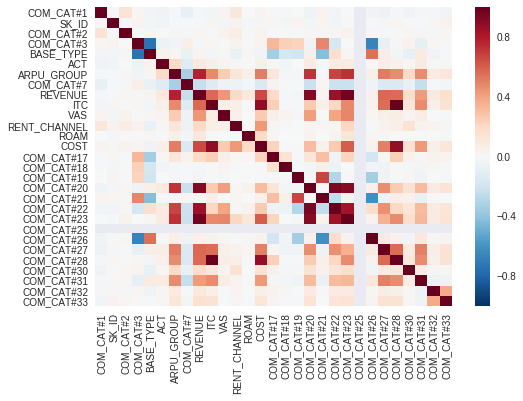

In [314]:
sns.set()
heats = sns.heatmap(X_train.corr()) # Строим корреляционную матрицу признаков с помощью heatmap 

In [0]:
features = [  # Оставляем наиболее значащие признаки
  'REVENUE',
  'ITC',
  'VAS',
  'RENT_CHANNEL',
  'COST',
  'COM_CAT#20',
  'COM_CAT#22',
  'COM_CAT#23',
  'COM_CAT#27',
  'COM_CAT#28',
  'COM_CAT#31'] 

In [316]:
y = target_table_train.CSI # Оставляем только значения CSI(Оценка абонента)
X = train[features] # Оставляем только признаки,которые отобрали на прошлом этапе
X_train, X_eval, Y_train, Y_eval = train_test_split(X, y, test_size = 0.1, random_state=42) #Делим всю обучающую выбрку еще на две выборки
X_train

,REVENUE,ITC,VAS,RENT_CHANNEL,COST,COM_CAT#20,COM_CAT#22,COM_CAT#23,COM_CAT#27,COM_CAT#28,COM_CAT#31
20764,0.110415,0.000000,0.084167,0.055011,0.004210,0.699277,0.699277,0.111859,0.000000,0.000000,0.013990
19504,0.136369,0.070078,0.104818,0.055012,0.012700,0.701854,0.700957,0.135571,0.010110,0.070078,0.042602
45331,0.136216,0.027363,0.088035,0.055303,0.007273,0.706003,0.706003,0.128902,0.038612,0.027363,0.054998
40130,0.125042,0.019195,0.084167,0.055046,0.006167,0.702919,0.702919,0.120352,0.027003,0.019195,0.043441
45748,0.114241,0.028624,0.084167,0.054965,0.007121,0.698372,0.698372,0.113829,0.008165,0.028624,0.024026
7240,0.130258,0.000644,0.084195,0.055282,0.004299,0.706205,0.706205,0.131457,0.001281,0.000644,0.039715
44360,0.118890,0.001436,0.084167,0.056714,0.004491,0.702048,0.702048,0.119852,0.002208,0.001436,0.008692
34112,0.145401,0.013660,0.085873,0.069163,0.006829,0.709585,0.709585,0.143385,0.015539,0.013660,0.043560
41068,0.142636,0.078973,0.084846,0.056800,0.012437,0.704268,0.704268,0.132896,0.049299,0.078973,0.144627
44348,0.109558,0.000000,0.084167,0.054972,0.004207,0.698977,0.698977,0.109409,0.006960,0.000000,0.004829


# Обучаем и оцениваем

In [317]:
forest = RandomForestClassifier(random_state = 0)

rfc_params = {
    'max_depth': np.arange(1, 10),
    'max_features': np.linspace(0.1, 1, 10),
    'n_estimators': list(np.arange(50,110,10))
}

rfc_grid = GridSearchCV(forest, rfc_params, cv=3, n_jobs=-1,error_score = "roc_auc")

rfc_grid.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='roc_auc',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'n_estimators': [50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [318]:
res = rfc_grid.predict(X_eval) 
print(rfc_grid.best_params_) # Получаем лучшие параметры при обучении
print('ROC_AUC:', roc_auc_score(Y_eval, res))
print('Accuracy:', accuracy_score(Y_eval, res))

{'max_depth': 5, 'max_features': 0.7000000000000001, 'n_estimators': 50}
ROC_AUC: 0.5
Accuracy: 0.83451536643026


In [319]:
def model_creator():
    model = models.Sequential()
    model.add(layers.Dense(120, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(60, activation='tanh')) 
    model.add(layers.Dense(30, activation='tanh'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics= ["acc"])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=model_creator, epochs=30, batch_size=3, verbose=1)))
pipeline = Pipeline(estimators)
results_roc_auc = cross_val_score(pipeline, X, y, cv=6, scoring='roc_auc')
results_accuracy = cross_val_score(pipeline, X, y, cv=6, scoring='accuracy')

Epoch 1/30
3518/3518 [==============================] - 5s 1ms/step - loss: 0.4414 - acc: 0.8459
Epoch 2/30
3518/3518 [==============================] - 2s 547us/step - loss: 0.4337 - acc: 0.8468
Epoch 3/30
3518/3518 [==============================] - 2s 550us/step - loss: 0.4333 - acc: 0.8468
Epoch 4/30
3518/3518 [==============================] - 2s 544us/step - loss: 0.4322 - acc: 0.8468
Epoch 5/30
3518/3518 [==============================] - 2s 544us/step - loss: 0.4319 - acc: 0.8468
Epoch 6/30
3518/3518 [==============================] - 2s 545us/step - loss: 0.4318 - acc: 0.8468
Epoch 7/30
3518/3518 [==============================] - 2s 546us/step - loss: 0.4301 - acc: 0.8468
Epoch 8/30
3518/3518 [==============================] - 2s 545us/step - loss: 0.4311 - acc: 0.8468
Epoch 9/30
3518/3518 [==============================] - 2s 548us/step - loss: 0.4306 - acc: 0.8468
Epoch 10/30
3518/3518 [==============================] - 2s 548us/step - loss: 0.4302 - acc: 0.8468
Epoch 11/30

In [321]:
print(results_roc_auc)
print(results_accuracy)

[0.46552804 0.51181363 0.4985295  0.53700834 0.46716358 0.51537562]
[0.83380682 0.87073864 0.84090909 0.84232955 0.83072546 0.84921764]


In [0]:
# clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
# param_dist = {'n_estimators': stats.randint(150, 500),
#               'learning_rate': stats.uniform(0.01, 0.07),
#               'subsample': stats.uniform(0.3, 0.7),
#               'max_depth': [3, 4, 5, 6, 7, 8, 9],
#               'colsample_bytree': stats.uniform(0.5, 0.45),
#               'min_child_weight': [1, 2, 3]
#              }
# clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = "roc_auc", error_score = 0, verbose = 3, n_jobs = -1)

# numFolds = 5
# folds = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

# estimators = []
# results = np.zeros(len(X))
# score = 0.0

# for train_index, test_index in folds:
#   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#   clf.fit(X_train, y_train)
    
#   estimators.append(clf.best_estimator_)
#   results[test_index] = clf.predict(X_test)
#   score += roc_auc_score(y_test, results[test_index])
# score /= numFolds

In [323]:
# Валидация для xgboost
estimator=xgb.XGBClassifier()
scores = np.array([])
for i in range(10):
    fold = KFold(n_splits=5, shuffle=True, random_state=i)
    scores_on_this_split = cross_val_score(
            estimator=xgb.XGBClassifier(), X=X_train, y=Y_train,
            cv=fold, scoring='roc_auc')
    scores = np.append(scores, scores_on_this_split)
    print(scores_on_this_split)

[0.59190161 0.53020603 0.53504244 0.53017623 0.53458508]
[0.51973958 0.52755673 0.53011314 0.52071433 0.55193401]
[0.52425707 0.58138021 0.51388838 0.53895125 0.52797683]
[0.50339242 0.5406088  0.56949227 0.50042536 0.49784664]
[0.52714234 0.54966438 0.54083181 0.53026833 0.56191082]
[0.50544056 0.51492443 0.55170221 0.53179283 0.54774226]
[0.54078447 0.55568864 0.57625799 0.54855847 0.54416565]
[0.51320203 0.55693607 0.51523973 0.55629032 0.61334491]
[0.5403416  0.58456637 0.52373906 0.50694068 0.52879149]
[0.55482774 0.54515276 0.54373197 0.54244802 0.52247706]


In [0]:
dtrain = xgb.DMatrix(X_train, label=Y_train) # Преобразуем данные DataFrame в DMatrix
deval = xgb.DMatrix(X_eval, label=Y_eval) # для XGBoost

param = {
    'max_depth': 21,  #depth of each tree
    'eta': 0.88,  # 0.3 the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 15,  # the number of classes that exist in this datset
        } 
num_round = 456 # the number of training iterations

In [325]:
bst = xgb.train(param, dtrain, num_round)

prob = bst.predict(deval)
pred_train = pd.DataFrame(np.asarray([np.argmax(line) for line in prob]))
print('Set Accuracy:', accuracy_score(Y_eval, pred_train))
print('ROC_AUC:', roc_auc_score(Y_eval, pred_train))

Set Accuracy: 0.8156028368794326
ROC_AUC: 0.5459328207203561


# Предсказываем

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4eb9241fd0>]],
      dtype=object)

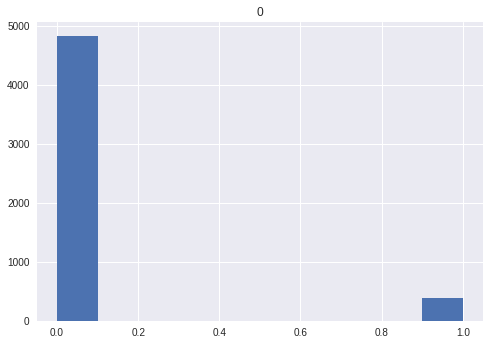

In [326]:
preds = bst.predict(xgb.DMatrix(test[features][1:5221])) # Обучаем модель на тестовой выборке
predictions = pd.DataFrame(np.asarray([np.argmax(line) for line in preds])) #Преобразуем данные в DataFrame

predictions.hist() 

In [327]:
submission=pd.DataFrame(predictions.values.ravel())

submission.describe() # Статистика значений

,0
count,5220.000000
mean,0.074713
std,0.262952
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Сохраняем

In [0]:
submission.to_csv("submission.csv", index=False)

### Рандом

In [0]:
# Но если все методы выше показались вам сложными, есть вариант проще - рандом.
random_data = []
for i in range(1,5221): #Запускаем цикл рандомно добавляющий 5221 раз 0 или 1
  random_data.append(random.randint(0,1))
output = pd.DataFrame(random_data) #Преобразуем данные в DataFrame
output.to_csv('random_submission.csv', index=False) # Сохраняем данные в файл)))